In [1]:
import qutip

In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math

In [3]:
#menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 40              #jumlah n medan
use_rwa = False
g_list = np.linspace(0, 5, 101)*2*np.pi #kuat interaksi

In [4]:
#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

## **Variasi $\hbar\omega_0/\Delta = 0.1$**

### $\epsilon/\Delta =0$

In [5]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa* (0*sx1 + 10*sz1)      #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

In [6]:
# Menghitung Hamiltonian
psi_list = []
E_list = []

for g in g_list:
    # Hamiltonian total
    H = Ho + Hq + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H.groundstate() 
    psi_list.append(eigen_state)


In [7]:
rho_q = []
for i in range(len(psi_list)):
  psi_value = psi_list[i]*psi_list[i].dag()
  rho = psi_value.ptrace(1)
  rho_q.append(rho)

In [8]:
S = []
for i in range(len(rho_q)):
  s_list = entropy_vn(rho_q[i])/0.695
  S.append(s_list)

### $\epsilon/\Delta = {0.1, 0.5, 1}$

In [9]:
S_list = []
for j in [1, 5, 10]:
  Hq2 = 0.5 * wa* (j*sx1 + 10*sz1)  

  psi_list2 = []
  E_list2 = []

  for g in g_list:
      H2 = Ho + Hq2 + g * H1
      eigen_energy2, eigen_state2 = H2.groundstate() 
      psi_list2.append(eigen_state2)

  rho_q2 = []
  for i in range(len(psi_list2)):
    psi_value = psi_list2[i]*psi_list2[i].dag()
    rho = psi_value.ptrace(1)
    rho_q2.append(rho)

  S2 = []
  for i in range(len(rho_q2)):
    s_list = entropy_vn(rho_q2[i], 2)
    S2.append(s_list)
  S_list.append(S2)

### **Plot Grafik Pertama**

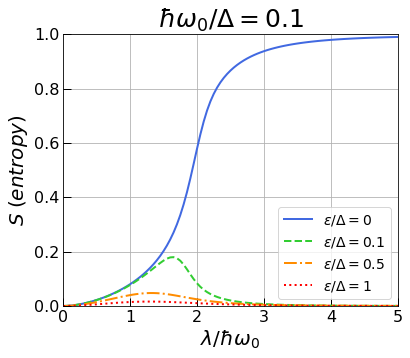

In [10]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))

axes.plot(g_list/(2*np.pi), S, 'royalblue', linewidth=2, label=r"$\epsilon/\Delta = 0$")
axes.plot(g_list/(2*np.pi), S_list[0], 'limegreen', linewidth=2, linestyle='dashed', label=r"$\epsilon/\Delta = 0.1$")
axes.plot(g_list/(2*np.pi), S_list[1], 'darkorange', linewidth=2, linestyle='-.', label=r"$\epsilon/\Delta = 0.5$")
axes.plot(g_list/(2*np.pi), S_list[2], 'red', linewidth=2, linestyle='dotted', label=r"$\epsilon/\Delta = 1$")

axes.set(xlim=(0, 5), ylim=(0, 1))
axes.set_ylabel(r"$S \;(entropy)$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.set_title(r"$\hbar\omega_0/\Delta = 0.1$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=16)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=16)
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=16)

axes.grid()
axes.legend(loc=4, fontsize=14)

## **Variasi $\hbar\omega_0/\Delta = 1$**

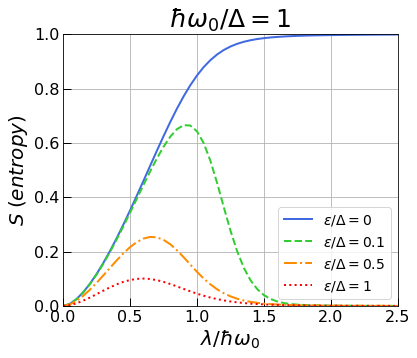

In [11]:
S_list1 = []
for j in [0, 0.1, 0.5, 1]:
  Hq2 = 0.5 * wa* (j*sx1 + 1*sz1)  

  psi_list2 = []
  E_list2 = []

  for g in g_list:
      H2 = Ho + Hq2 + g * H1
      eigen_energy2, eigen_state2 = H2.groundstate() 
      psi_list2.append(eigen_state2)

  rho_q2 = []
  for i in range(len(psi_list2)):
    psi_value = psi_list2[i]*psi_list2[i].dag()
    rho = psi_value.ptrace(1)
    rho_q2.append(rho)

  S2 = []
  for i in range(len(rho_q2)):
    s_list = entropy_vn(rho_q2[i], 2)
    S2.append(s_list)
  S_list1.append(S2)

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))

axes.plot(g_list/(2*np.pi), S_list1[0], 'royalblue', linewidth=2, label=r"$\epsilon/\Delta = 0$")
axes.plot(g_list/(2*np.pi), S_list1[1], 'limegreen', linewidth=2, linestyle='dashed', label=r"$\epsilon/\Delta = 0.1$")
axes.plot(g_list/(2*np.pi), S_list1[2], 'darkorange', linewidth=2, linestyle='-.', label=r"$\epsilon/\Delta = 0.5$")
axes.plot(g_list/(2*np.pi), S_list1[3], 'red', linewidth=2, linestyle='dotted', label=r"$\epsilon/\Delta = 1$")

axes.set(xlim=(0, 2.5), ylim=(0, 1))
axes.set_ylabel(r"$S \;(entropy)$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.set_title(r"$\hbar\omega_0/\Delta = 1$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=16)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=16)

axes.grid()
axes.legend(loc=4, fontsize=14)

## **Variasi $\hbar\omega_0/\Delta = 10$**

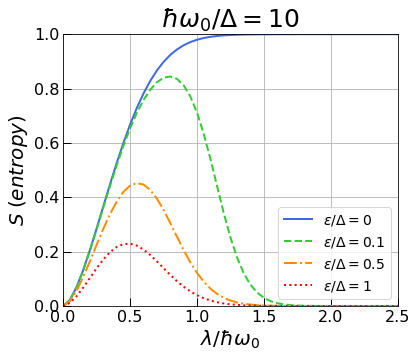

In [12]:
S_list2 = []
for j in [0, 0.01, 0.05, 0.1]:
  Hq2 = 0.5 * wa* (j*sx1 + 0.1*sz1)  

  psi_list2 = []
  E_list2 = []

  for g in g_list:
      H2 = Ho + Hq2 + g * H1
      eigen_energy2, eigen_state2 = H2.groundstate() 
      psi_list2.append(eigen_state2)

  rho_q2 = []
  for i in range(len(psi_list2)):
    psi_value = psi_list2[i]*psi_list2[i].dag()
    rho = psi_value.ptrace(1)
    rho_q2.append(rho)

  S2 = []
  for i in range(len(rho_q2)):
    s_list = entropy_vn(rho_q2[i], 2)
    S2.append(s_list)
  S_list2.append(S2)

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))

axes.plot(g_list/(2*np.pi), S_list2[0], 'royalblue', linewidth=2, label=r"$\epsilon/\Delta = 0$")
axes.plot(g_list/(2*np.pi), S_list2[1], 'limegreen', linewidth=2, linestyle='dashed', label=r"$\epsilon/\Delta = 0.1$")
axes.plot(g_list/(2*np.pi), S_list2[2], 'darkorange', linewidth=2, linestyle='-.', label=r"$\epsilon/\Delta = 0.5$")
axes.plot(g_list/(2*np.pi), S_list2[3], 'red', linewidth=2, linestyle='dotted', label=r"$\epsilon/\Delta = 1$")

axes.set(xlim=(0, 2.5), ylim=(0, 1))
axes.set_ylabel(r"$S \;(entropy)$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.set_title(r"$\hbar\omega_0/\Delta = 10$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=16)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=16)

axes.grid()
axes.legend(loc=4, fontsize=14)